In [1]:
import os
import numpy as np
import splitfolders
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from keras.callbacks import EarlyStopping
from keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator

## 파일 나누기

In [2]:
%pwd

'c:\\Python\\GETI'

In [3]:
splitfolders.ratio(r'C:\Users\LIM\Downloads\tomato\val', './data', seed=1337, ratio = (0.0, 0.8, 0.2))

Copying files: 1000 files [00:00, 2280.01 files/s]


In [1]:
file_path = r'C:\Users\LIM\Downloads\tomato\train\Tomato___healthy'
len(file_path)

52

## 모델학습

In [2]:
num_epoch=20                 
batch_size=32                   
learning_rate=0.001               
dropout_rate=0.3        
input_shape=(128, 128, 3)               
num_class=10      

In [3]:
train_dir = r'C:\Users\LIM\Downloads\tomato\train'
test_dir = './data/test/'

train_datagen = ImageDataGenerator (
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

# 디렉토리에서 이미지를 불러와 배치로 변환
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)             

Found 10000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [4]:
# 합성곱 연산층
model = models.Sequential()

model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(dropout_rate))

# 가중치 업데이트
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(num_class, activation = 'softmax'))

# 수정
- 학습률을 올리기위해 합성곱 연산층 레이어 추가 및 수정

In [5]:
# monitor = 모니터링 할 지표 선택
# patience = 지정된 epochs 동안 개선 없을 경우 중단
# restore = 훈련 중단 시 가장 좋은 가중치로 변환
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights=True)

model.compile(optimizer = tf.optimizers.Adam(learning_rate),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

## 모델학습

In [6]:
history = model.fit(
    train_generator,
    epochs=num_epoch,
    callbacks=early_stopping,
    validation_data=test_generator,
)

Epoch 1/20
313/313 [==============================] - 275s 876ms/step - loss: 2.1025 - acc: 0.2100 - val_loss: 1.8076 - val_acc: 0.4000
Epoch 2/20
313/313 [==============================] - 259s 828ms/step - loss: 1.6952 - acc: 0.3791 - val_loss: 1.2929 - val_acc: 0.5300
Epoch 3/20
313/313 [==============================] - 253s 808ms/step - loss: 1.3233 - acc: 0.5199 - val_loss: 1.1045 - val_acc: 0.6450
Epoch 4/20
313/313 [==============================] - 251s 801ms/step - loss: 1.1208 - acc: 0.5919 - val_loss: 1.0058 - val_acc: 0.6500
Epoch 5/20
313/313 [==============================] - 252s 804ms/step - loss: 1.0152 - acc: 0.6306 - val_loss: 1.0298 - val_acc: 0.6300
Epoch 6/20
313/313 [==============================] - 252s 804ms/step - loss: 0.9709 - acc: 0.6459 - val_loss: 0.7977 - val_acc: 0.7300
Epoch 7/20
313/313 [==============================] - 234s 747ms/step - loss: 0.8679 - acc: 0.6836 - val_loss: 0.6868 - val_acc: 0.7800
Epoch 8/20
313/313 [============================

## 모델 시각화

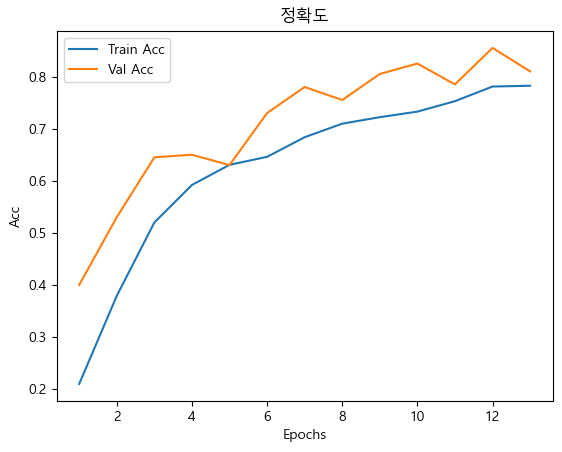

In [9]:
import matplotlib as mpl

mpl.rcParams['font.family'] = "Malgun Gothic"

train_acc = history.history['acc']
val_acc = history.history['val_acc']
val_acc

plt.plot(list(range(1, 14)), train_acc, label = 'Train Acc')
plt.plot(list(range(1, 14)), val_acc, label = 'Val Acc')
plt.title('정확도')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [11]:
test_data = test_datagen.flow_from_directory(
    "./data/val/",
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)      

Found 800 images belonging to 10 classes.


In [ ]:
test_generator.filenames

# 모델 검증

In [13]:
# model.predict()
y_true = []
for filename in test_data.filenames:
    if "Bacterial_spot" in filename:
        y_true.append(0)
    elif "Early_blight" in filename:
        y_true.append(1)
    elif "Late_blight" in filename:
        y_true.append(2)
    elif "Leaf_Mold" in filename:
        y_true.append(3)
    elif "Septoria_leaf_spot" in filename:
        y_true.append(4)
    elif "Spider_mites Two-spotted_spider_mite" in filename:
        y_true.append(5)
    elif "Target_Spot" in filename:
        y_true.append(6)
    elif "Tomato_Yellow_Leaf_Curl_Virus" in filename:
        y_true.append(7)
    elif "Tomato_mosaic_virus" in filename:
        y_true.append(8)
    else:
        y_true.append(9)

In [14]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = []
for pred in model.predict(test_data, verbose=0):
    y_pred.append(np.argmax(pred))

In [15]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        80
           1       0.81      0.76      0.79        80
           2       0.88      0.79      0.83        80
           3       0.83      0.81      0.82        80
           4       0.71      0.71      0.71        80
           5       0.71      0.90      0.79        80
           6       0.83      0.69      0.75        80
           7       0.89      0.82      0.86        80
           8       0.96      0.97      0.97        80
           9       0.92      0.95      0.93        80

    accuracy                           0.83       800
   macro avg       0.84      0.83      0.83       800
weighted avg       0.84      0.83      0.83       800



- precision(정밀도) : 모델이 양성으로 예측한 샘플 중 실제로 양성인 샘플의 비율을 나타냄
- recall(재현율) : 실제 양성인 샘플 중 모델이 양성으로 예측한 샘플의 비율을 나타냄
- f1-score(f1-점수) : 정밀도와 재현율의 평균, 이는 두 지표간의 균형을 나타냄
- support : 각 클래스에 속한 샘플의 수 데이터셋에서 각 클래스의 실제 샘플 수를 나타냄

In [16]:
model.save('./model.h5')

c:\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model.save('./model.keras')

- UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`. 오류 해결